In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('test.csv', names=["1","2","3","4","5","6","7","8","9","result"])

In [76]:
win = 0
draw = 0
for i in df['result'] != 'draw':
    if i:
        win = win + 1
    else:
        draw = draw + 1

print(win)
print(draw)

861
139


Text(0, 0.5, 'Frequency')

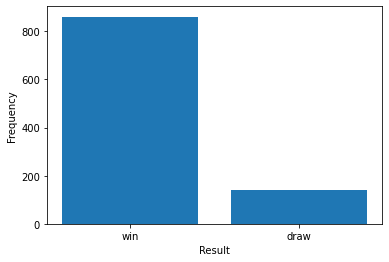

In [77]:
x = ["win", "draw"]
y = [win, draw]

plt.bar(x, y)
plt.xlabel('Result')
plt.ylabel('Frequency')

In [78]:
df_w_x = df[df['result'] == 'x']
df_w_o = df[df['result'] == 'o']

In [79]:
def countVal(arr, val):
    count = 0
    for i in arr:
        if i == val:
            count = count + 1
    return count

In [80]:
winx_prob = []
wino_prob = []
df_w_x = df_w_x.drop(columns="result")
df_w_o = df_w_o.drop(columns="result")
header = df_w_x.columns.tolist()

In [81]:
for i in header:
    winx_prob.append(countVal(df_w_x[i].tolist(), 1))
    wino_prob.append(countVal(df_w_o[i].tolist(), -1))

In [82]:
total_w = sum(winx_prob)
total_o = sum(wino_prob)
for i in range(len(header)):
    winx_prob[i] = winx_prob[i]/total_w
    wino_prob[i] = wino_prob[i]/total_o

In [83]:
priority_x = []
priority_o = []
for i in range(len(header)):
    priority_x.append(winx_prob.index(max(winx_prob)))
    priority_o.append(wino_prob.index(max(wino_prob)))
    winx_prob[winx_prob.index(max(winx_prob))] = float('-inf')
    wino_prob[wino_prob.index(max(wino_prob))] = float('-inf')
print(priority_x)
print(priority_o)

[4, 2, 6, 8, 0, 3, 5, 7, 1]
[4, 2, 8, 0, 6, 5, 7, 1, 3]
